# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

In [18]:
import cv2

In [19]:
import base64
with open("beach.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4QDeRXhpZgAASUkqAAgAAAAGABIBAwABAAAAAQAAABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAABMCAwABAAAAAQAAAGmHBAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAAABwAAkAcABAAAADAyMTABkQcABAAAAAECAwCGkgcAFQAAAMAAAAAAoAcABAAAADAxMDABoAMAAQAAAP//AAACoAQAAQAAAMQJAAADoAQAAQAAAIMGAAAAAAAAQVNDSUkAAABQaWNzdW0gSUQ6IDEzAP/bAEMACAYGBwYFCAcHBwkJCAoMFA0MCwsMGRITDxQdGh8eHRocHCAkLicgIiwjHBwoNyksMDE0NDQfJzk9ODI8LjM0Mv/bAEMBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIBoMJxAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAAAQIDBAUGB//EABkBAQEBAQEBAAAAAAAAAAAAAAABAgMEBf/aAAwDAQACEAMQAAAB7gPv5QGBBFoAAKwcJgJiGNA0KwYmAmA0wBMTGCaGDEmlkhgmAADEDTBDHFsTTBNAMEwAAaCGmKAgYCYCYhoYMiMEMAaAAAGACAGAAm4jAESQAhgADENA0AAAAhgDBAAmxACYDQAAAADQm0AIbQAAAxAxDQAyI0DAjIABDQAANAAAmOyLahoKUkCYgGhpgDQlJCYyIwTYRbQACGgGCABpiABDE0xMQADiwTBE0xMQxACYhggYgABAANAA0OLBMBA0iDqLAFJEZCRNoQ0IkgTQJoaaoHEBoASJyiIapNoSYyhgk0gBQhAAIapKSQTCLQgmqi2kQ0RbVgpQAGkAlZBMSBMrqg/P66bstFmC2ONPVFVk1ICUITCQAhqAxMRKLQwYACYAxAwVNoBo

(np.float64(-0.5), np.float64(2499.5), np.float64(1666.5), np.float64(-0.5))

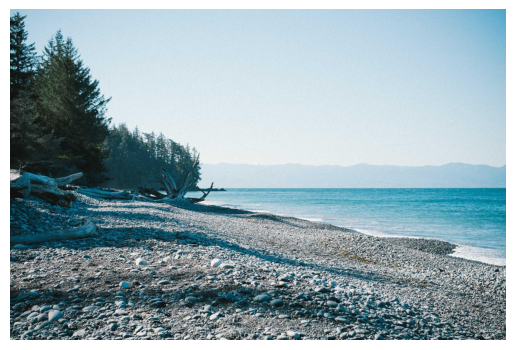

In [20]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

with open("image_data.txt", "r") as file:
    base64_image = file.read()

# Since the encoded base64 string is too long so i have made a text file and read content from it
# If you want to run on your pc just copy the printed string above and then paste below

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")


## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [21]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

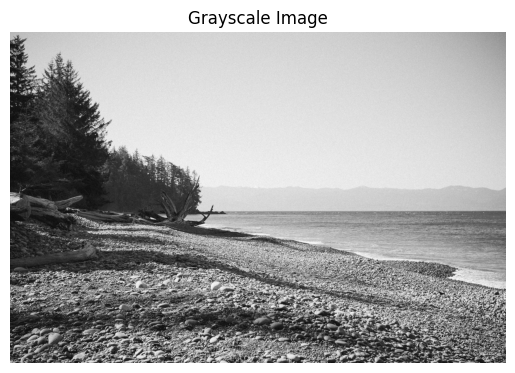

In [22]:
gray_img_pil = img.convert('L')
gray_array = np.array(gray_img_pil)
plt.imshow(gray_array,cmap='gray')
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

/tmp/ipython-input-414763223.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_array.ravel(),256,[0,256])


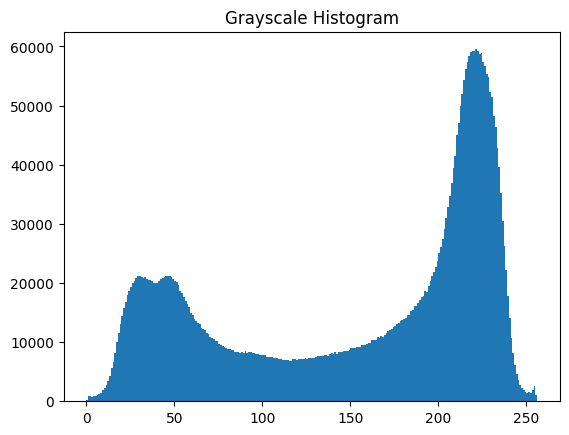

In [23]:
plt.hist(gray_array.ravel(),256,[0,256])
plt.title("Grayscale Histogram")
plt.show()

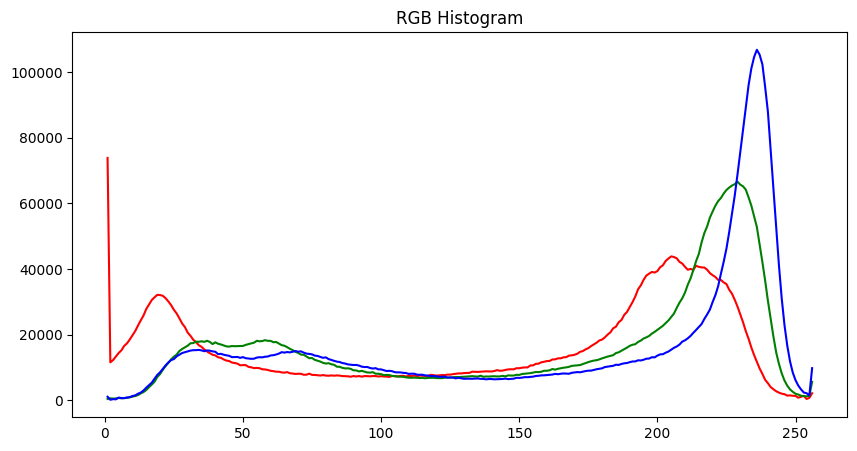

In [24]:
rgb_array = np.array(img)
plt.figure(figsize=(10, 5))
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    channel_data = rgb_array[:, :, i]
    counts,bin_edges = np.histogram(channel_data.ravel(),256,[0,256])
    plt.plot(bin_edges[1:], counts, color=color)
plt.title("RGB Histogram")
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [25]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

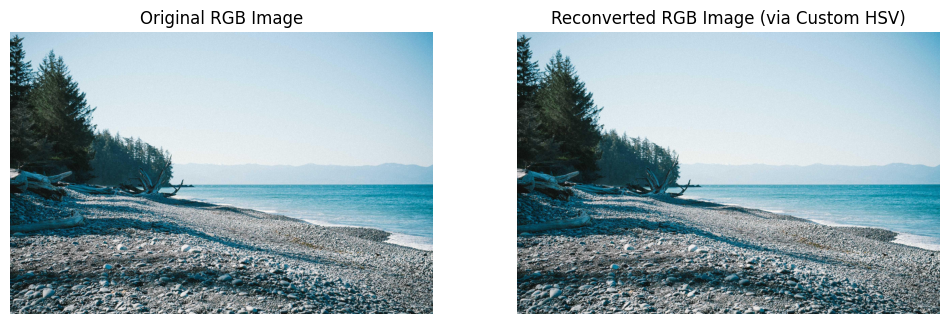

In [26]:
def rgb_to_hsv(rgb_img):
    # Normalize RGB values to [0, 1]
    rgb_normalized = rgb_img.astype(np.float32) / 255.0

    R, G, B = rgb_normalized[:, :, 0], rgb_normalized[:, :, 1], rgb_normalized[:, :, 2]

    # Cmax, Cmin, Delta
    Cmax = np.maximum(np.maximum(R, G), B)
    Cmin = np.minimum(np.minimum(R, G), B)
    Delta = Cmax - Cmin

    # Value (V)
    V = Cmax

    # Saturation (S)
    S = np.zeros_like(V)
    # Avoid division by zero where Cmax is 0
    s_mask = Cmax != 0
    S[s_mask] = Delta[s_mask] / Cmax[s_mask]

    # Calculate Hue (H) in degrees [0, 360)
    H = np.zeros_like(V)

    # Masks for different Hue calculation cases where Delta is not zero
    r_mask = (Cmax == R) & (Delta != 0)
    g_mask = (Cmax == G) & (Delta != 0)
    b_mask = (Cmax == B) & (Delta != 0)

    # Hue calculation based on which channel is Cmax
    H[r_mask] = (60 * (((G[r_mask] - B[r_mask]) / Delta[r_mask]) % 6))
    H[g_mask] = (60 * (((B[g_mask] - R[g_mask]) / Delta[g_mask]) + 2))
    H[b_mask] = (60 * (((R[b_mask] - G[b_mask]) / Delta[b_mask]) + 4))

    # Ensure Hue is non-negative
    H[H < 0] += 360

    H_opencv = (H / 2).astype(np.uint8)
    S_opencv = (S * 255).astype(np.uint8)
    V_opencv = (V * 255).astype(np.uint8)

    # Stack channels to form HSV image
    hsv_img = np.stack((H_opencv, S_opencv, V_opencv), axis=-1)

    return hsv_img

# RGB to HSV using the custom function
hsv_image_custom = rgb_to_hsv(rgb_array)

# Verification
reconverted_rgb = cv2.cvtColor(hsv_image_custom, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(rgb_array)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconverted_rgb)
plt.title('Reconverted RGB Image (via Custom HSV)')
plt.axis('off')

plt.show()


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [27]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

***Filter 1 Name : "The White Walker’s Holiday"***

Filter Explanation: The White Walker’s Holiday
I love Game of thrones very much, this filtered is very much inspired by it ,creating effects like landscape shooted as in GOT.Following are the modifications that this filter include :
 1. **Lifted Blacks (Matte Effect)**: I chose to lift the black point by adding a small offset to all pixel values. This reduces overall contrast in shadows, creating a 'matte' or 'foggy' appearance that contributes to an ethereal, cold atmosphere.
 2.  **Desaturation (stripping warm colors)**: Initially, global saturation is reduced. Then, specifically warm hues (reds and yellows) are targeted and further desaturated. This strips away natural warmth, making elements like foliage, skin tones, or sunny areas appear aged, harsh, or lifeless, reinforcing the cold theme.
 3.  **Cold Split-Toning**: Blue is introduced into the shadowed areas by selectively reducing red/green and boosting blue channels for darker pixels. Similarly, cyan (green + blue) is added to the mid-tones. This creates a distinct 'chilling' cast over the image, enhancing the overall 'frozen' and 'unwelcoming' look.


This filter is particularly suitable for images with natural elements, landscapes, or scenes where a dramatic, cold, and slightly surreal mood is desired.


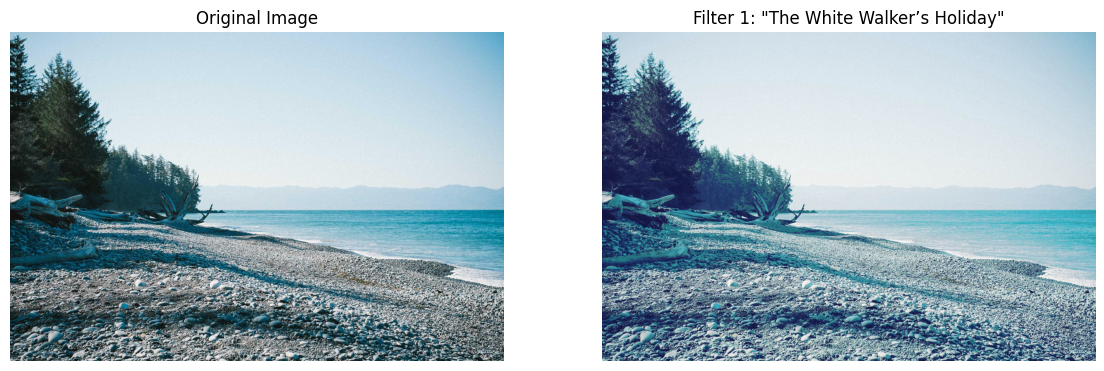

In [28]:
def white_walker_filter(img_rgb):

    img_float = img_rgb.astype(np.float32) / 255.0
    filtered_img = np.copy(img_float)

    # Lifted Blacks
    lift_amount = 0.08
    filtered_img = filtered_img * (1 - lift_amount) + lift_amount
    filtered_img = np.clip(filtered_img, 0, 1)

    # Desaturation (stripping warm colors)
    hsv_img = cv2.cvtColor(filtered_img, cv2.COLOR_RGB2HSV)

    global_desaturation_factor = 0.7 # Reduce global saturation by 30%
    hsv_img[:, :, 1] *= global_desaturation_factor

    # Target warm hues (Red, Orange, Yellow) for further desaturation.
    red_hue_range1 = (0, 0.08) #lower red range
    red_hue_range2 = (0.92, 1.0) #upper red range
    yellow_hue_range = (0.08, 0.20) #yellow/orange range

    hue_channel = hsv_img[:, :, 0]

    # Create masks for warm hues
    warm_hue_mask = ((hue_channel >= red_hue_range1[0]) & (hue_channel <= red_hue_range1[1])) | \
                    ((hue_channel >= red_hue_range2[0]) & (hue_channel <= red_hue_range2[1])) | \
                    ((hue_channel >= yellow_hue_range[0]) & (hue_channel <= yellow_hue_range[1]))

    # Further desaturate warm hues only
    hsv_img[warm_hue_mask, 1] *= 0.5

    # Convert back to RGB from HSV
    filtered_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
    filtered_img = np.clip(filtered_img, 0, 1)

    # Cold Split-Toning
    value_channel = hsv_img[:, :, 2]

    shadow_threshold = 0.35 # Pixels with V < 0.35 are shadows
    mid_tone_threshold_low = 0.35
    mid_tone_threshold_high = 0.75 # Pixels with 0.35 <= V < 0.75 are mid-tones

    shadow_mask = value_channel < shadow_threshold
    mid_tone_mask = (value_channel >= mid_tone_threshold_low) & (value_channel < mid_tone_threshold_high)

    # Apply tinting directly to RGB channels based on masks:

    # Blue into shadows: Reduce Red and Green, boost Blue in shadowed areas
    blue_shadow_boost = 0.12 # boost blue
    red_shadow_reduce = 0.06 # reduce red
    green_shadow_reduce = 0.06 # reduce green

    filtered_img[shadow_mask, 0] = np.maximum(0, filtered_img[shadow_mask, 0] - red_shadow_reduce) # Reduce Red
    filtered_img[shadow_mask, 1] = np.maximum(0, filtered_img[shadow_mask, 1] - green_shadow_reduce) # Reduce Green
    filtered_img[shadow_mask, 2] = np.minimum(1, filtered_img[shadow_mask, 2] + blue_shadow_boost) # Boost Blue

    # Cyan into mid-tones: Reduce Red, boost Green and Blue in mid-tone areas
    cyan_mid_green_boost = 0.1 # boost green
    cyan_mid_blue_boost = 0.1 # boost blue
    red_mid_reduce = 0.05 # reduce red

    filtered_img[mid_tone_mask, 0] = np.maximum(0, filtered_img[mid_tone_mask, 0] - red_mid_reduce) # Reduce Red
    filtered_img[mid_tone_mask, 1] = np.minimum(1, filtered_img[mid_tone_mask, 1] + cyan_mid_green_boost) # Boost Green
    filtered_img[mid_tone_mask, 2] = np.minimum(1, filtered_img[mid_tone_mask, 2] + cyan_mid_blue_boost) # Boost Blue

    filtered_img = np.clip(filtered_img, 0, 1)

    return (filtered_img * 255).astype(np.uint8)

# Apply the filter
filtered_image_ww = white_walker_filter(rgb_array)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(rgb_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_ww)
plt.title('Filter 1: "The White Walker’s Holiday"')
plt.axis('off')

plt.show()

In [29]:
# WHY I CHOOSE
# I chose to strip out the warmth and add a blue freeze to turn a regular beach into a scene from Game of Thrones.
# WHY IT SUITS
# It fits perfectly because the rough driftwood and grey stones look way more dramatic and mysterious when they feel icy and foggy rather than just sunny.

***Filter 2: Fifty shades of Teal and Orange***
The 'Fifty Shades of Teal and Orange' filter applies
1. A Contrast S-Curve to deepen shadows and brighten highlights
2. Performs Cinematic Split-Toning by adding cool teal to dark areas and warm orange/gold to bright areas,
3. And finishes with a Saturation Boost for vibrant colors.

It's best suited for images with strong natural lighting, landscapes (like beach scenes or sunsets), and any photography seeking a dramatic, high-contrast, 'filmic' aesthetic.

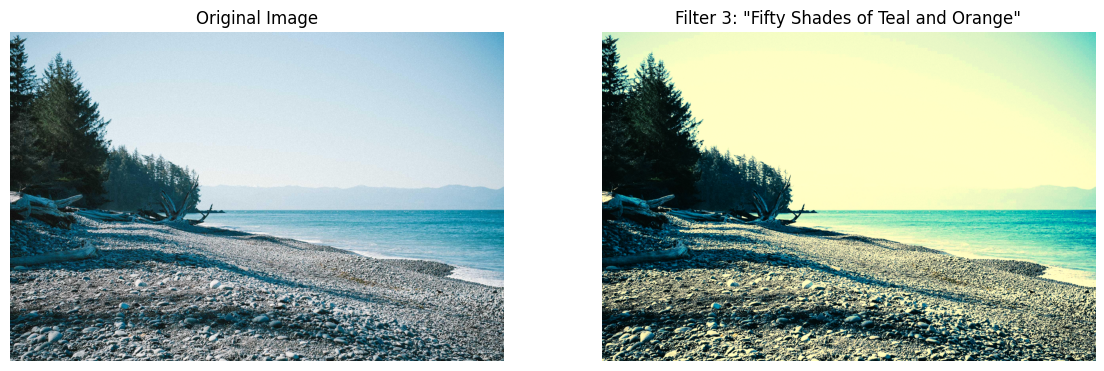

In [30]:
def fifty_shades_of_teal_and_orange_filter(img_rgb):

    img_float = img_rgb.astype(np.float32) / 255.0
    #S-curve to the Value (luminance) channel for cinematic contrast
    hsv_temp = cv2.cvtColor(img_float, cv2.COLOR_RGB2HSV)
    v_channel = hsv_temp[:, :, 2] # Extract Value channel

    # Sigmoid-like S-curve function for contrast
    contrast_strength_v = 8.0 # Adjust for stronger/weaker S-curve effect
    v_channel_s_curve = 1 / (1 + np.exp(-contrast_strength_v * (v_channel - 0.5))) # Apply S-curve

    hsv_temp[:, :, 2] = v_channel_s_curve # Update Value channel
    processed_img = cv2.cvtColor(hsv_temp, cv2.COLOR_HSV2RGB)
    processed_img = np.clip(processed_img, 0, 1)

    # Split-Toning (Teal in Shadows, Orange in Highlights)
    # Use the S-curve adjusted V-channel for masking shadows and highlights
    shadow_threshold = 0.35 # Pixels with V < 0.35 are shadows
    highlight_threshold = 0.75 # Pixels with V > 0.75 are highlights

    shadow_mask = v_channel_s_curve < shadow_threshold
    highlight_mask = v_channel_s_curve > highlight_threshold

    # Apply Teal tint to shadows: Reduce Red, boost Green and Blue
    processed_img[shadow_mask, 0] = np.clip(processed_img[shadow_mask, 0] * 0.80, 0, 1)
    processed_img[shadow_mask, 1] = np.clip(processed_img[shadow_mask, 1] * 1.15, 0, 1)
    processed_img[shadow_mask, 2] = np.clip(processed_img[shadow_mask, 2] * 1.20, 0, 1)

    # Apply Orange tint to highlights: Boost Red and Green, reduce Blue
    processed_img[highlight_mask, 0] = np.clip(processed_img[highlight_mask, 0] * 1.20, 0, 1)
    processed_img[highlight_mask, 1] = np.clip(processed_img[highlight_mask, 1] * 1.10, 0, 1)
    processed_img[highlight_mask, 2] = np.clip(processed_img[highlight_mask, 2] * 0.85, 0, 1)

    processed_img = np.clip(processed_img, 0, 1)

    # Saturation Boost
    hsv_final = cv2.cvtColor(processed_img, cv2.COLOR_RGB2HSV)
    saturation_factor = 1.25
    hsv_final[:, :, 1] = np.clip(hsv_final[:, :, 1] * saturation_factor, 0, 1)

    processed_img = cv2.cvtColor(hsv_final, cv2.COLOR_HSV2RGB)
    processed_img = np.clip(processed_img, 0, 1)

    return (processed_img * 255).astype(np.uint8)

filtered_image_teal_orange = fifty_shades_of_teal_and_orange_filter(rgb_array)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(rgb_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_teal_orange)
plt.title('Filter 3: "Fifty Shades of Teal and Orange"')
plt.axis('off')

plt.show()


In [31]:
# Why I choose
# I used the classic "Teal and Orange" Hollywood look to make the water feel deeper and the sunlit wood pop.
# Why it suits
# It works great here because the contrast boost brings out the texture of the pebbles, while the colors make the whole scene feel like a high-budget movie shot rather than just a snapshot.

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [32]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

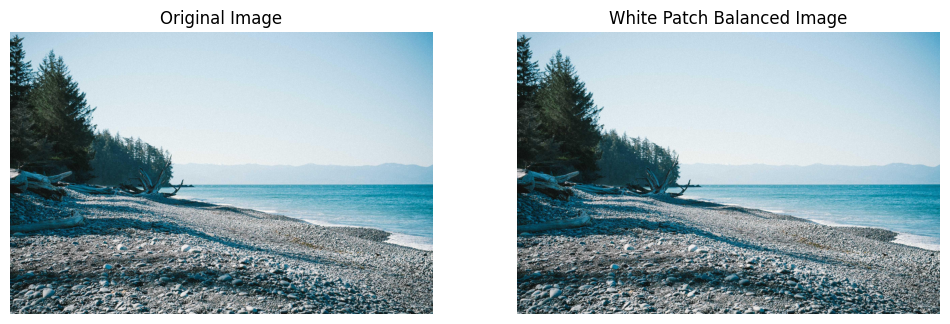

In [33]:
def white_patch_balance(img_rgb):

    img_float = img_rgb.astype(np.float32)

    # Finding the maximum intensity for each channel across the entire image
    max_r = np.max(img_float[:, :, 0])
    max_g = np.max(img_float[:, :, 1])
    max_b = np.max(img_float[:, :, 2])

    # Determine the target maximum value (255 for 8-bit images)
    target_max = 255.0

    # If a max_channel is 0, avoid division by zero; no scaling needed for that channel
    scale_r = target_max / max_r if max_r > 0 else 1.0
    scale_g = target_max / max_g if max_g > 0 else 1.0
    scale_b = target_max / max_b if max_b > 0 else 1.0

    balanced_img = np.copy(img_float)
    balanced_img[:, :, 0] *= scale_r
    balanced_img[:, :, 1] *= scale_g
    balanced_img[:, :, 2] *= scale_b

    balanced_img = np.clip(balanced_img, 0, 255).astype(np.uint8)

    return balanced_img

# Apply white patch balancing
balanced_image = white_patch_balance(rgb_array)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(rgb_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(balanced_image)
plt.title('White Patch Balanced Image')
plt.axis('off')

plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [34]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.